# Hand On 3  
# Fundamentos Teóricos  
## Redes Neuronales Multicapa (RNM)  
### Una RNM es un modelo de aprendizaje automático inspirado en el funcionamiento del cerebro humano  


**Fórmula de una neurona en la capa \(l\):**

$$ z_j^l = \sum_{i} w_{ji}^l a_i^{l-1} + b_j^l $$

$$ a_j^l = \sigma(z_j^l) $$

Donde:
- \( w_{ji}^l \) son los pesos,
- \( b_j^l \) es el sesgo,
- \( \sigma \) es la función de activación,
- \( a_i^{l-1} \) es la activación de la neurona \(i\) en la capa anterior.

## Bakpropagarion 
### Es un algoritmo de aprendizaje utilizado en redes neuronales artificiales para minimizar el error en la predicción ajustando los pesos de la red. Se basa en la regla de la cadena del cálculo diferencial y el descenso de gradiente.

## Como funciona?  
- Propagación hacia adelante: Se ingresan los datos en la red y se calcula la salida mediante una serie de operaciones en las capas ocultas.
- Cálculo del error: Se compara la salida obtenida con la salida esperada, calculando la diferencia (error).
- Propagación hacia atrás: Se propaga el error desde la capa de salida hacia las capas anteriores, ajustando los pesos utilizando el gradiente del error con respecto a cada peso.
- Actualización de pesos: Se modifican los pesos utilizando el descenso de gradiente, reduciendo gradualmente el error.

### **1. Propagación hacia adelante**
Cada neurona realiza la siguiente operación:

$$z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)}$$

$$a^{(l)} = f(z^{(l)})$$

Donde:
- \( z^{(l)} \) es la suma ponderada de la capa \( l \).
- \( W^{(l)} \) son los pesos de la capa \( l \).
- \( a^{(l)} \) es la activación de la capa \( l \).
- \( b^{(l)} \) es el sesgo (bias) de la capa \( l \).
- \( f \) es la función de activación.

---

### **2. Cálculo del error**
El error de la salida se mide con una función de costo, por ejemplo, el **error cuadrático medio (MSE)**:

$$J(W, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Para clasificación, se usa la **entropía cruzada**:

$$J(W, b) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

---

### **3. Propagación hacia atrás (cálculo del gradiente)**
El error en la capa de salida (\( \delta^{(L)} \)) se obtiene como:

$$\delta^{(L)} = \frac{\partial J}{\partial a^{(L)}} \odot f'(z^{(L)})$$

El error se propaga hacia capas anteriores:

$$\delta^{(l)} = (W^{(l+1)})^T \delta^{(l+1)} \odot f'(z^{(l)})$$

---

### **4. Actualización de pesos (Descenso de Gradiente)**
Los pesos y sesgos se actualizan con la regla del **descenso de gradiente**:

$$W^{(l)} = W^{(l)} - \eta \frac{\partial J}{\partial W^{(l)}}$$

$$b^{(l)} = b^{(l)} - \eta \frac{\partial J}{\partial b^{(l)}}$$

Los gradientes se calculan como:

$$\frac{\partial J}{\partial W^{(l)}} = \delta^{(l)} (a^{(l-1)})^T$$

$$\frac{\partial J}{\partial b^{(l)}} = \delta^{(l)}$$

# Implementación Paso a Paso

## Inicio 
## Importaciones

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                            classification_report, ConfusionMatrixDisplay)


# Carga y Exploración del Dataset

In [15]:
# Cargar dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear DataFrame para visualización
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Mostrar primeras filas
print("Primeras 5 filas del dataset:")
display(iris_df.head())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(iris_df.describe())


Primeras 5 filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Estadísticas descriptivas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Visualización de Datosm

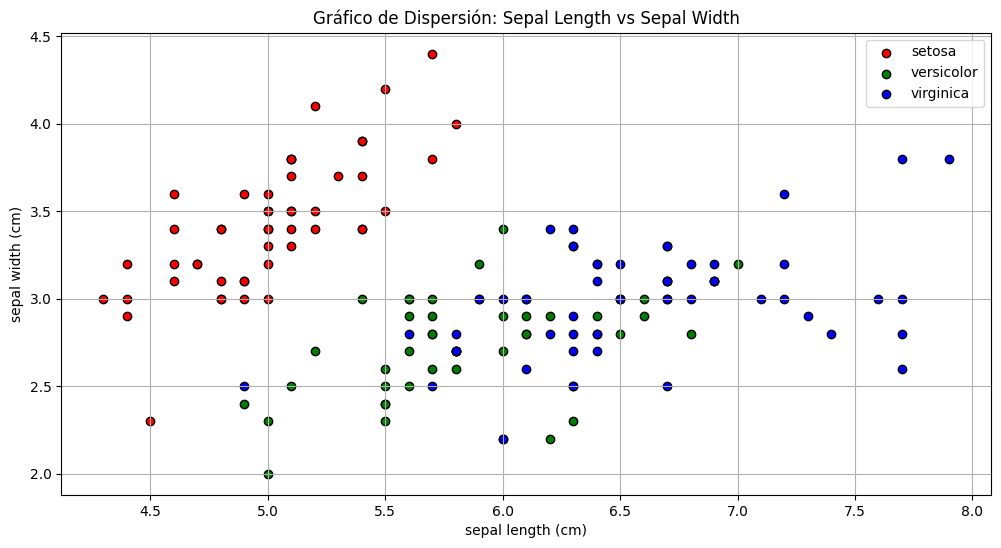

In [7]:
# Gráfico de dispersión
plt.figure(figsize=(12, 6))
colors = ['red', 'green', 'blue']

for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], 
                c=colors[i], label=target_names[i],
                edgecolor='black')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Gráfico de Dispersión: Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

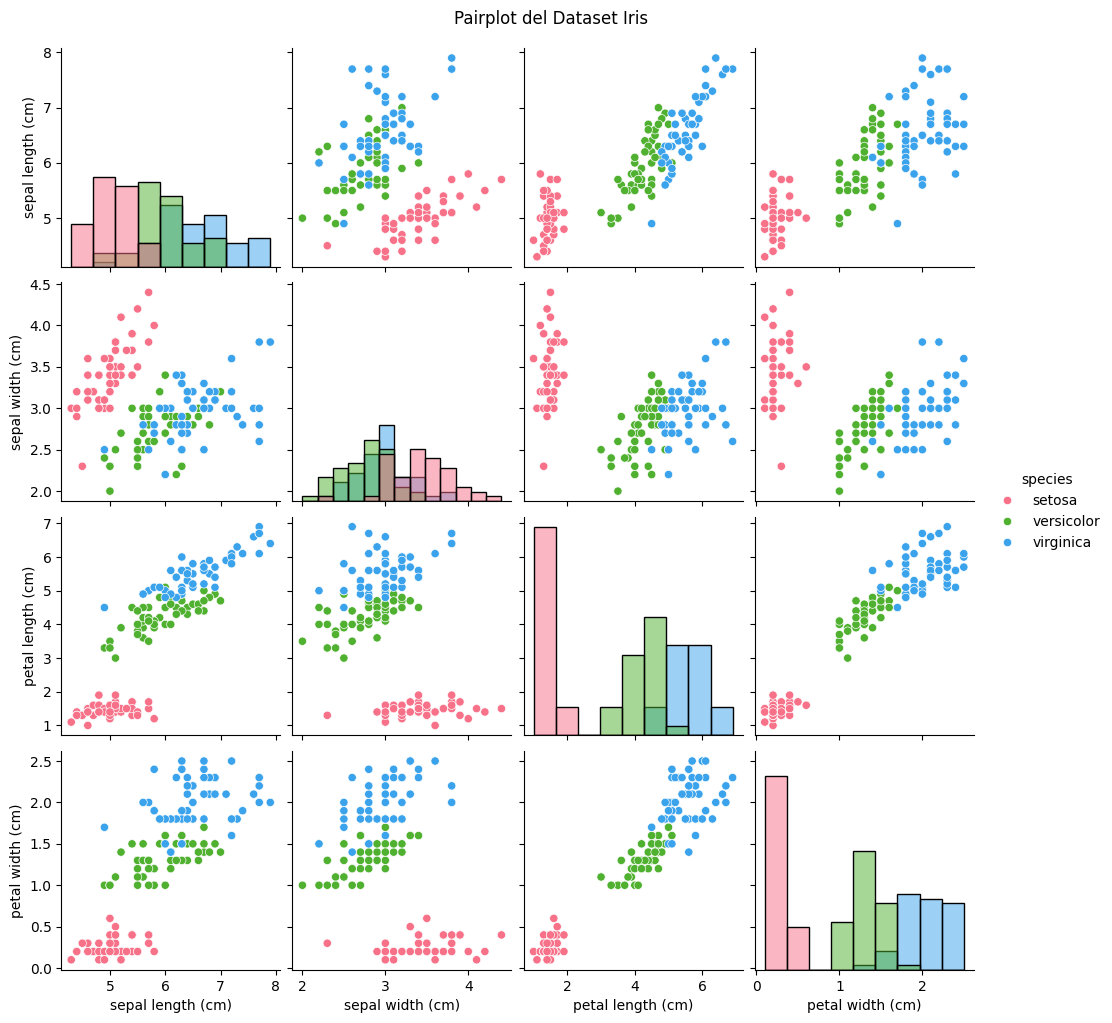

In [8]:
# Pairplot
sns.pairplot(iris_df, hue='species', palette='husl', 
             vars=feature_names, diag_kind='hist')
plt.suptitle('Pairplot del Dataset Iris', y=1.02)
plt.show()

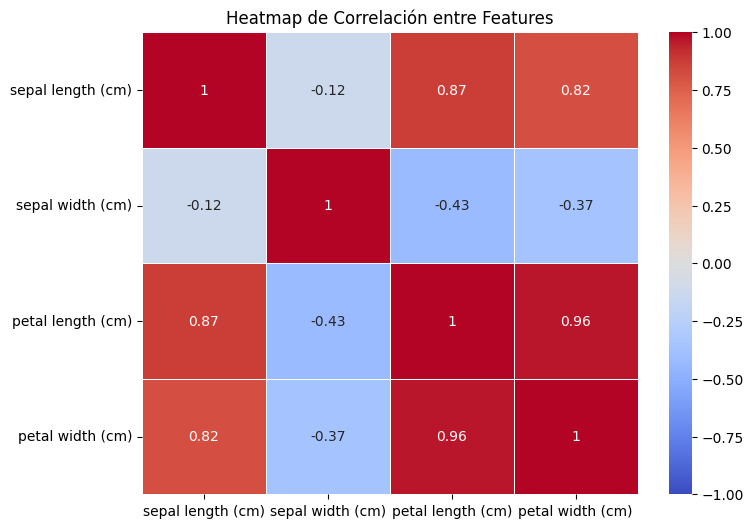

In [9]:
# Heatmap de correlación
plt.figure(figsize=(8, 6))
corr_matrix = iris_df[feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap de Correlación entre Features')
plt.show()

In [10]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")



Tamaño del conjunto de entrenamiento: 105 muestras
Tamaño del conjunto de prueba: 45 muestras


In [11]:
# Crear y entrenar el modelo MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 5),  # Dos capas ocultas con 10 y 5 neuronas
    activation='relu',          # Función de activación ReLU
    solver='adam',              # Optimizador Adam
    alpha=0.0001,              # Término de regularización L2
    batch_size='auto',         # Tamaño de batch automático
    learning_rate='constant',  # Tasa de aprendizaje constante
    learning_rate_init=0.001,  # Tasa de aprendizaje inicial
    max_iter=1000,            # Máximo número de iteraciones
    random_state=42,
    verbose=True               # Mostrar progreso
)

mlp.fit(X_train_scaled, y_train)


Iteration 1, loss = 1.16686879
Iteration 2, loss = 1.16321026
Iteration 3, loss = 1.15955241
Iteration 4, loss = 1.15592302
Iteration 5, loss = 1.15232688
Iteration 6, loss = 1.14876062
Iteration 7, loss = 1.14523469
Iteration 8, loss = 1.14170293
Iteration 9, loss = 1.13818144
Iteration 10, loss = 1.13465095
Iteration 11, loss = 1.13112470
Iteration 12, loss = 1.12761575
Iteration 13, loss = 1.12417896
Iteration 14, loss = 1.12078305
Iteration 15, loss = 1.11741646
Iteration 16, loss = 1.11410357
Iteration 17, loss = 1.11083622
Iteration 18, loss = 1.10758577
Iteration 19, loss = 1.10438065
Iteration 20, loss = 1.10120779
Iteration 21, loss = 1.09805987
Iteration 22, loss = 1.09498119
Iteration 23, loss = 1.09200606
Iteration 24, loss = 1.08908408
Iteration 25, loss = 1.08623373
Iteration 26, loss = 1.08344976
Iteration 27, loss = 1.08071102
Iteration 28, loss = 1.07802456
Iteration 29, loss = 1.07541605
Iteration 30, loss = 1.07281739
Iteration 31, loss = 1.07028198
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42,
              verbose=True)


Exactitud (Accuracy) del modelo: 0.9556

Matriz de Confusión:


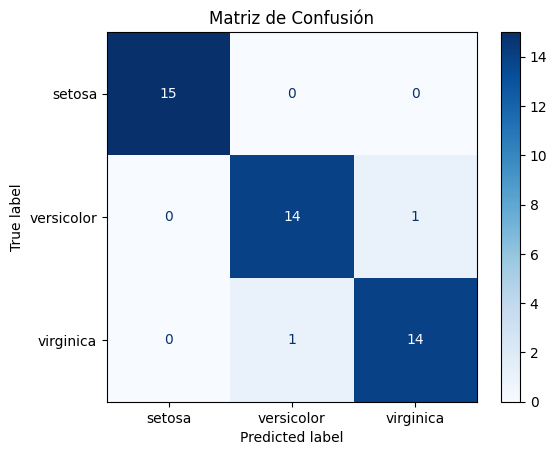


Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [12]:
# Predicciones
y_pred = mlp.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud (Accuracy) del modelo: {accuracy:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=target_names)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))


# Interpretación de Métricas

##  Proporcion de predicciones positivas correctas  $$\frac{TP}{TP + FP} $$  

##  Proporción de positivos reales identificados correctamente  $$\frac{TP}{TP+FN}$$

## F1-score: Media armónica de precision y recall  $$ F1=2 * \frac{precision x rescall}{precision + rescall} $$

## Accuracy: Proporción de predicciones correctas sobre el total  $$ \frac { TP + TN}{TP+TN+FP+FN} $$


In [39]:
#Visualización de la Pérdida durante el Entrenamiento

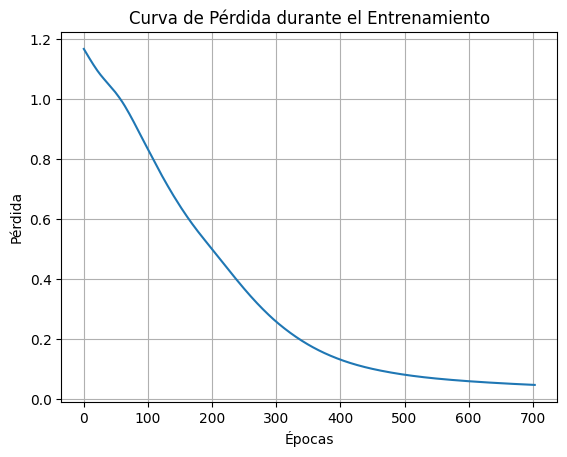

In [13]:
# Graficar la curva de pérdida
plt.plot(mlp.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()
